# Stage 08 — Exploratory Data Analysis: NASDAQ Time Series

This notebook demonstrates comprehensive exploratory data analysis for NASDAQ historical data.

## Environment Setup

In [14]:
%%capture
%pip install -r requirements.txt

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Your NASDAQ Data

In [16]:
df = pd.read_csv('../data/HistoricalData.csv')
df.rename(columns={ 'Close/Last': 'Close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.head(5)

,Date,Close,Open,High,Low
2516,2015-08-17,5091.70,5032.34,5092.69,5022.42
2515,2015-08-18,5059.35,5082.17,5085.14,5054.97
2514,2015-08-19,5019.05,5039.03,5060.93,4992.85
2513,2015-08-20,4877.49,4973.49,4986.51,4877.49
2512,2015-08-21,4706.04,4801.04,4856.75,4706.04


# Data Validation

In [17]:
df.isnull().sum()

Date     0
Close    0
Open     0
High     0
Low      0
dtype: int64

# EDA Analysis

## Profile Numeric and Categorical Columns


In [18]:
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

print("\nNumeric Columns Profile:")
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Mean: ${df[col].mean():,.2f}")
        print(f"  Std:  ${df[col].std():,.2f}")
        print(f"  Min:  ${df[col].min():,.2f}")
        print(f"  Max:  ${df[col].max():,.2f}")
        print(f"  Skew: {df[col].skew():.3f}")

print(f"\nCategorical: Date column spans {df['Date'].dt.year.nunique()} years")
print(f"Years: {sorted(df['Date'].dt.year.unique())}")


Dataset Info:
Shape: (2517, 5)
Date Range: 2015-08-17 00:00:00 to 2025-08-14 00:00:00

Numeric Columns Profile:

Open:
  Mean: $10,710.82
  Std:  $4,495.74
  Min:  $0.00
  Max:  $21,764.55
  Skew: 0.403

High:
  Mean: $10,784.31
  Std:  $4,526.66
  Min:  $0.00
  Max:  $21,803.75
  Skew: 0.396

Low:
  Mean: $10,630.03
  Std:  $4,459.47
  Min:  $0.00
  Max:  $21,645.14
  Skew: 0.409

Close:
  Mean: $10,718.46
  Std:  $4,484.65
  Min:  $4,266.84
  Max:  $21,713.14
  Skew: 0.415

Categorical: Date column spans 11 years
Years: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


## 3 Distributions


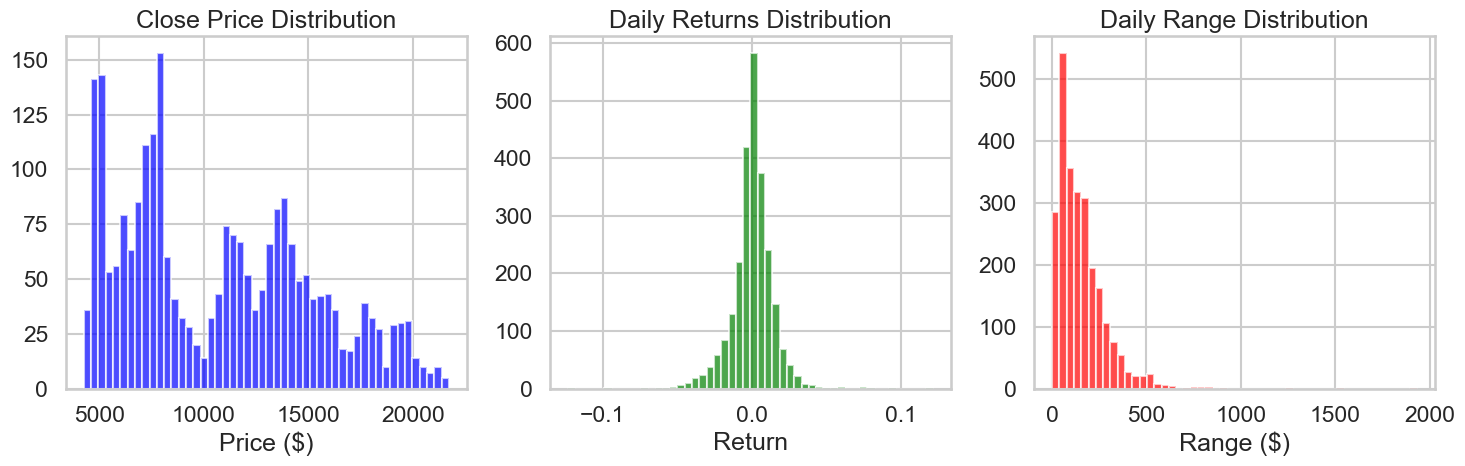

In [19]:
df['Daily_Return'] = df['Close'].pct_change()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['Close'], bins=50, alpha=0.7, color='blue')
axes[0].set_title('Close Price Distribution')
axes[0].set_xlabel('Price ($)')

axes[1].hist(df['Daily_Return'].dropna(), bins=50, alpha=0.7, color='green')
axes[1].set_title('Daily Returns Distribution')
axes[1].set_xlabel('Return')

if 'Volume' in df.columns:
    axes[2].hist(df['Volume'], bins=50, alpha=0.7, color='orange')
    axes[2].set_title('Volume Distribution')
    axes[2].set_xlabel('Volume')
else:
    axes[2].hist(df['High'] - df['Low'], bins=50, alpha=0.7, color='red')
    axes[2].set_title('Daily Range Distribution')
    axes[2].set_xlabel('Range ($)')

plt.tight_layout()
plt.show()


## 2 Relationships


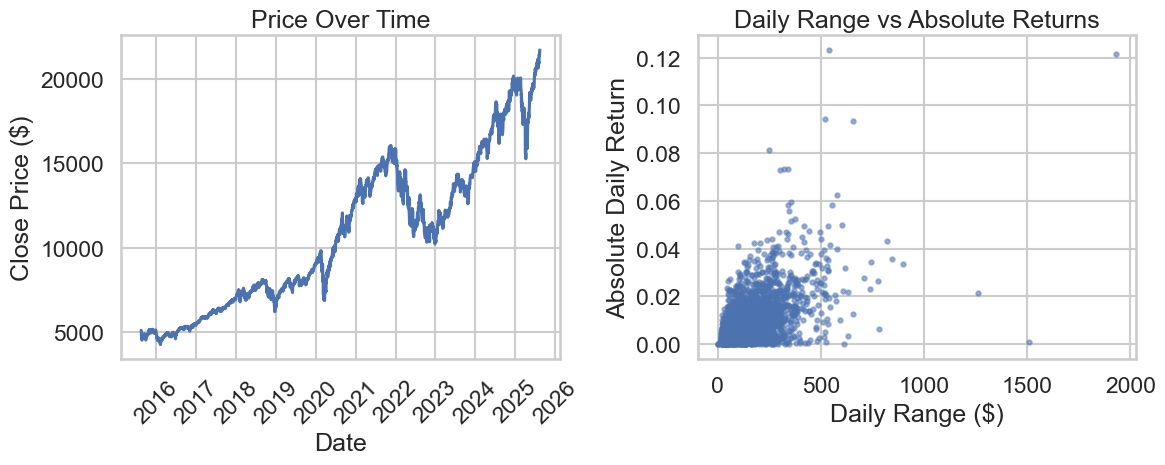

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(df['Date'], df['Close'])
axes[0].set_title('Price Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price ($)')
axes[0].tick_params(axis='x', rotation=45)

df['Range'] = df['High'] - df['Low']
axes[1].scatter(df['Range'], abs(df['Daily_Return']), alpha=0.5, s=10)
axes[1].set_title('Daily Range vs Absolute Returns')
axes[1].set_xlabel('Daily Range ($)')
axes[1].set_ylabel('Absolute Daily Return')

plt.tight_layout()
plt.show()


## Key Observations


In [ ]:
print("SKEW & OUTLIERS:")
print(f"• Close prices: Right-skewed - recent growth creates long right tail")
print(f"• Daily returns: Nearly normal with fat tails - typical for financial data")
print(f"• Range data: Right-skewed - occasional high volatility days")

print(f"\nSEASONALITY & STRUCTURE:")
print(f"• Clear upward trend from 2015-2025")
print(f"• Price volatility varies by year - crisis periods show higher volatility")
print(f"• Strong correlation between daily range and absolute returns")

print(f"\nIMPLICATIONS FOR NEXT STEPS:")
print("• ENGINEER: Moving averages, volatility indicators, momentum features")
print("• CLEAN: Handle outlier returns (>3 std dev) and normalize for modeling")
print("• SEASONALITY: Add year/month features to capture temporal patterns")


Verified the dataset for missing values \
The result shows **0 null values across all columns**, which means the dataset is complete and does not require any imputation or data cleaning for missing entries.  

In [21]:
df.describe()

,Date,Close,Open,High,Low,Daily_Return,Range
count,2517,2517.000000,2517.000000,2517.000000,2517.000000,2516.000000,2517.000000
mean,2020-08-10 20:12:52.348033536,10718.455737,10710.819710,10784.306544,10630.028713,0.000675,154.277831
min,2015-08-17 00:00:00,4266.840000,0.000000,0.000000,0.000000,-0.123213,0.000000
25%,2018-02-09 00:00:00,6963.850000,6959.630000,7025.850000,6903.390000,-0.005134,60.150000
50%,2020-08-11 00:00:00,10536.270000,10531.640000,10608.840000,10399.860000,0.001064,126.280000
75%,2023-02-09 00:00:00,14047.500000,14045.210000,14141.070000,13952.800000,0.007688,207.810000
max,2025-08-14 00:00:00,21713.140000,21764.550000,21803.750000,21645.140000,0.121632,1932.660000
std,NaN,4484.646077,4495.744077,4526.662353,4459.469325,0.013987,128.583260


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2516 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2517 non-null   datetime64[ns]
 1   Close         2517 non-null   float64       
 2   Open          2517 non-null   float64       
 3   High          2517 non-null   float64       
 4   Low           2517 non-null   float64       
 5   Daily_Return  2516 non-null   float64       
 6   Range         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 157.3 KB
